## **Notebook to make predictions with reprocessed Henson data and SPOT**

By Christina Schenk and Garrett Roell

Tested on biodesign_3.7 kernel on jprime

### SPOT predictions and evaluations
This notebook predicts fluxes for R. opacus cultures growing with phenol. The data was published in [Henson (2018)](https://www.sciencedirect.com/science/article/pii/S1096717618300910).

#### **Data Labels:**
                                                 
#### Henson:
* WT 0.5g/L Phenol 		(**WT-P**)
* PVHG6 0.5g/L  Phenol 	(**PVHG-P**)

### Method: 
<ul>
    <li>WT</li>
    <ol>    
    <li>Predict fluxes with SPOT</li>
    <li>Compare predictions with 13CMFA: Scatter plots and flux maps</li>
   </ol>
    <li>PVHG</li>
    <ol>    
    <li>Predict fluxes with SPOT</li>
    <li>Compare predictions with 13CMFA: Scatter plots and flux maps</li>
   </ol>
</ul>

3. Load file with observed growth rates (Notebook E)
    
4. Compare growth rate predictions with growth rate observations



#### **Set up imports**

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import cobra
import scipy.stats
#import cplex
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import matplotlib.image as mpimg
import matplotlib.cm as cm

from edd_utils import login, export_study, export_metadata

from sklearn.metrics import r2_score

output_dir = '../plots/'
source_dir = '../src'
sys.path.append(source_dir)
from ensemblemethods import *


from plot import *
from utils import *

#### **Load Genome Scale Model**

In [2]:
model = cobra.io.read_sbml_model("../models/Ropacus_annotated.xml")

#### **Load Transcript Data**

In [3]:
# read transcripts and isolate wildtype phenol data and adapted strain wildtype data
transcript_df = pd.read_csv('../data/transcripts/csv/henson_CPM_melted.csv')
transcript_df_wt = transcript_df[transcript_df['Line Name'].str.contains("WT-P")]
transcript_df_pvhg = transcript_df[transcript_df['Line Name'].str.contains("PVHG-P")]

#### **Run SPOT for Each Wild Type Trial**

In [4]:
# create dictionary to hold spot solutions
spot_solutions_wt = {}

for trial in ['WT-P-R1', 'WT-P-R2','WT-P-R3']:

    # display trial name
    trial_number = trial.split('-R')[1]
    trial_name = f'phenol_spot_wt_{trial_number}'
    print(trial_name)

    transcriptomics = transcript_df_wt[transcript_df_wt['Line Name'] == trial]

    # map the transcripts to genome scale reactions
    trans_data = construct_trans_df(transcriptomics, trial)

    # run spot to get genome scale fluxes
    spot_sol = spot_pred(model, trans_data, trial, 'phenol', sub_uptake_rate=100)

    print(f"The phenol uptake rate is {spot_sol['EX_phenol_e']}")

    # add spot solution to dictionary
    spot_solutions_wt[trial_name] = spot_sol

phenol_spot_wt_1


{'EX_ca2_e': inf,
 'EX_cl_e': inf,
 'EX_cobalt2_e': inf,
 'EX_cu2_e': inf,
 'EX_fe2_e': inf,
 'EX_fe3_e': inf,
 'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_k_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_mobd_e': inf,
 'EX_nh4_e': inf,
 'EX_o2_e': inf,
 'EX_pi_e': inf,
 'EX_so4_e': inf,
 'EX_zn2_e': inf,
 'EX_phenol_e': inf}

The phenol uptake rate is -0.03020635125213659
phenol_spot_wt_2


{'EX_ca2_e': inf,
 'EX_cl_e': inf,
 'EX_cobalt2_e': inf,
 'EX_cu2_e': inf,
 'EX_fe2_e': inf,
 'EX_fe3_e': inf,
 'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_k_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_mobd_e': inf,
 'EX_nh4_e': inf,
 'EX_o2_e': inf,
 'EX_pi_e': inf,
 'EX_so4_e': inf,
 'EX_zn2_e': inf,
 'EX_phenol_e': inf}

The phenol uptake rate is -0.05123572263229673
phenol_spot_wt_3


{'EX_ca2_e': inf,
 'EX_cl_e': inf,
 'EX_cobalt2_e': inf,
 'EX_cu2_e': inf,
 'EX_fe2_e': inf,
 'EX_fe3_e': inf,
 'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_k_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_mobd_e': inf,
 'EX_nh4_e': inf,
 'EX_o2_e': inf,
 'EX_pi_e': inf,
 'EX_so4_e': inf,
 'EX_zn2_e': inf,
 'EX_phenol_e': inf}

The phenol uptake rate is -0.07787507029124265


#### **Run SPOT for Each Adapted Strain (PVHG) Trial**

In [5]:
# create dictionary to hold spot solutions
spot_solutions_pvhg = {}

for trial in ['PVHG-P-R1', 'PVHG-P-R2','PVHG-P-R3']:

    # display trial name
    trial_number = trial.split('-R')[1]
    trial_name = f'phenol_spot_pvhg_{trial_number}'
    print(trial_name)

    transcriptomics = transcript_df_pvhg[transcript_df_pvhg['Line Name'] == trial]

    # map the transcripts to genome scale reactions
    trans_data = construct_trans_df(transcriptomics, trial)

    # run spot to get genome scale fluxes
    spot_sol = spot_pred(model, trans_data, trial, 'phenol', sub_uptake_rate=100)

    print(f"The phenol uptake rate is {spot_sol['EX_phenol_e']}")

    # add spot solution to dictionary
    spot_solutions_pvhg[trial_name] = spot_sol

phenol_spot_pvhg_1


{'EX_ca2_e': inf,
 'EX_cl_e': inf,
 'EX_cobalt2_e': inf,
 'EX_cu2_e': inf,
 'EX_fe2_e': inf,
 'EX_fe3_e': inf,
 'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_k_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_mobd_e': inf,
 'EX_nh4_e': inf,
 'EX_o2_e': inf,
 'EX_pi_e': inf,
 'EX_so4_e': inf,
 'EX_zn2_e': inf,
 'EX_phenol_e': inf}

The phenol uptake rate is -0.019234165756196832
phenol_spot_pvhg_2


{'EX_ca2_e': inf,
 'EX_cl_e': inf,
 'EX_cobalt2_e': inf,
 'EX_cu2_e': inf,
 'EX_fe2_e': inf,
 'EX_fe3_e': inf,
 'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_k_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_mobd_e': inf,
 'EX_nh4_e': inf,
 'EX_o2_e': inf,
 'EX_pi_e': inf,
 'EX_so4_e': inf,
 'EX_zn2_e': inf,
 'EX_phenol_e': inf}

The phenol uptake rate is -0.014555346563163986
phenol_spot_pvhg_3


{'EX_ca2_e': inf,
 'EX_cl_e': inf,
 'EX_cobalt2_e': inf,
 'EX_cu2_e': inf,
 'EX_fe2_e': inf,
 'EX_fe3_e': inf,
 'EX_h2o_e': inf,
 'EX_h_e': inf,
 'EX_k_e': inf,
 'EX_mg2_e': inf,
 'EX_mn2_e': inf,
 'EX_mobd_e': inf,
 'EX_nh4_e': inf,
 'EX_o2_e': inf,
 'EX_pi_e': inf,
 'EX_so4_e': inf,
 'EX_zn2_e': inf,
 'EX_phenol_e': inf}

The phenol uptake rate is -0.021599685660133483


#### **Save Phenol WT SPOT Genome Scale Fluxes**

In [6]:
# loop over solution dictionary. Convert the flux solutions, convert each to a dataframe and save as csv
for trial_name, flux_solution in spot_solutions_wt.items():

    flux_df = spot_solution_to_df(model, flux_solution)
    flux_df.to_csv(f'../data/genome_scale_fluxes/{trial_name}.csv', index=False)

    display(flux_df.head(5))

,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,2.905064e-13
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,0.000000e+00
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,-4.975054e-13
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,1.727759e-11
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,1.430764e-12


,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,-2.783277e-12
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,0.000000e+00
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,-4.961277e-12
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,5.264575e-11
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,-1.683702e-12


,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,-4.360986e-12
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,1.387779e-17
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,-4.333503e-12
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,7.475972e-11
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,-2.558257e-12


#### **Save Phenol PVHG SPOT Genome Scale Fluxes**

In [7]:
# loop over solution dictionary. Convert the flux solutions, convert each to a dataframe and save as csv
for trial_name, flux_solution in spot_solutions_pvhg.items():

    flux_df = spot_solution_to_df(model, flux_solution)
    flux_df.to_csv(f'../data/genome_scale_fluxes/{trial_name}.csv', index=False)

    display(flux_df.head(5))

,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,9.266919e-13
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,1.734723e-18
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,-4.997135e-13
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,2.057651e-11
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,7.145269e-13


,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,-9.896835e-13
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,-1.734723e-18
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,-1.173696e-12
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,1.725992e-11
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,1.920406e-12


,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,-4.435346e-12
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,-3.469447e-18
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,-2.943951e-12
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,2.867567e-11
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,4.039264e-12


#### **Get Average and Standard Deviation of WT Genome Scale Fluxes**

In [8]:
# can curate trials to use
relevant_trials = [
    'phenol_spot_wt_1', 
    'phenol_spot_wt_2', 
    'phenol_spot_wt_3',
]

# get list of relevant flux vectors
flux_vectors = [spot_solutions_wt[trial_name] for trial_name in relevant_trials]

# combine into a single dataframe
all_flux_vector_df = pd.concat(flux_vectors, axis=1)

# calculate average and standard deviation of flux vectors
average_spot_solution_wt = pd.DataFrame(all_flux_vector_df.mean(axis=1), columns=['fluxes'])
std_spot_solution_wt =  pd.DataFrame(all_flux_vector_df.std(axis=1), columns=['stds'])

display(average_spot_solution_wt.head())
display(std_spot_solution_wt.head())

,fluxes
12DGR140tipp,-2.284585e-12
13PPDH,4.625929e-18
1P2CBXLCYCL,-3.264095e-12
1P2CBXLR,4.822769e-11
23CTI1,-9.370652e-13


,stds
12DGR140tipp,2.365505e-12
13PPDH,8.012345e-18
1P2CBXLCYCL,2.416410e-12
1P2CBXLR,2.899462e-11
23CTI1,2.096705e-12


#### **Get average and standard deviation of Adapted Strain Genome Scale Fluxes**

In [9]:
# can curate trials to use
relevant_trials = [
    'phenol_spot_pvhg_1', 
    'phenol_spot_pvhg_2', 
    'phenol_spot_pvhg_3',
]

# get list of relevant flux vectors
flux_vectors = [spot_solutions_pvhg[trial_name] for trial_name in relevant_trials]

# combine into a single dataframe
all_flux_vector_df = pd.concat(flux_vectors, axis=1)

# calculate average and standard deviation of flux vectors
average_spot_solution_pvhg = pd.DataFrame(all_flux_vector_df.mean(axis=1), columns=['fluxes'])
std_spot_solution_pvhg =  pd.DataFrame(all_flux_vector_df.std(axis=1), columns=['stds'])

display(average_spot_solution_pvhg.head())
display(std_spot_solution_pvhg.head())

,fluxes
12DGR140tipp,-1.499446e-12
13PPDH,-1.156482e-18
1P2CBXLCYCL,-1.539120e-12
1P2CBXLR,2.217070e-11
23CTI1,2.224733e-12


,stds
12DGR140tipp,2.717123e-12
13PPDH,2.649834e-18
1P2CBXLCYCL,1.262428e-12
1P2CBXLR,5.872469e-12
23CTI1,1.683131e-12


#### **Load Phenol 13C MFA Data**

In [10]:
phenol_fluxes = pd.read_csv('../data/central_fluxes/phenol_13C.csv')

# # Remove rows that do not have a mapping to the GSM
phenol_fluxes.dropna(subset = ["Forward Reactions"], inplace=True)
print(f'There are {len(phenol_fluxes)} fluxes that can be compared between the MFA and SPOT')

phenol_fluxes.head()

There are 44 fluxes that can be compared between the MFA and SPOT


,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound
0,Substrate Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,"( 80, -450)",100.0000,100.0000,100.0000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-0.4793,-1.4219,0.9306
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",-2.0000,-2.0000,-0.7683
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",-2.0000,-2.0000,-0.7683
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",-2.0000,-2.0000,-0.7683


#### **Map Phenol SPOT fluxes to 13C MFA Reactions**

In [11]:
average_spot_solution_wt.head()

,fluxes
12DGR140tipp,-2.284585e-12
13PPDH,4.625929e-18
1P2CBXLCYCL,-3.264095e-12
1P2CBXLR,4.822769e-11
23CTI1,-9.370652e-13


In [12]:
phenol_fluxes = add_pred_fluxes_to_13c_df(phenol_fluxes, average_spot_solution_wt,   std_spot_solution_wt,   'phenol', 'SPOT', 'WT')
phenol_fluxes = add_pred_fluxes_to_13c_df(phenol_fluxes, average_spot_solution_pvhg, std_spot_solution_pvhg, 'phenol', 'SPOT', 'PVHG')
phenol_fluxes.head()

scale_factor fluxes    1883.036515
Name: EX_phenol_e, dtype: float64
scale_factor fluxes    5416.218522
Name: EX_phenol_e, dtype: float64


,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound,SPOT WT Value,SPOT WT std Value,SPOT PVHG Value,SPOT PVHG std Value
0,Substrate Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,"( 80, -450)",100.0000,100.0000,100.0000,1.000000e+02,4.498445e+01,1.000000e+02,1.941669e+01
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-0.4793,-1.4219,0.9306,1.146024e-07,6.063194e-08,2.370352e-07,2.121693e-07
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",-2.0000,-2.0000,-0.7683,-8.034527e-01,1.391621e+00,3.896560e-07,6.110359e-07
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",-2.0000,-2.0000,-0.7683,-8.034527e-01,1.391621e+00,3.990474e-07,6.154761e-07
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",-2.0000,-2.0000,-0.7683,-2.010478e+00,6.463946e-01,-9.319570e+00,4.088538e+00


#### **Save Phenol SPOT Central Flux Predictions**

In [13]:
phenol_fluxes.to_csv('../data/central_fluxes/phenol_spot.csv', index=False)

#### **Plot WT Phenol SPOT Fluxes vs 13C MFA Fluxes**

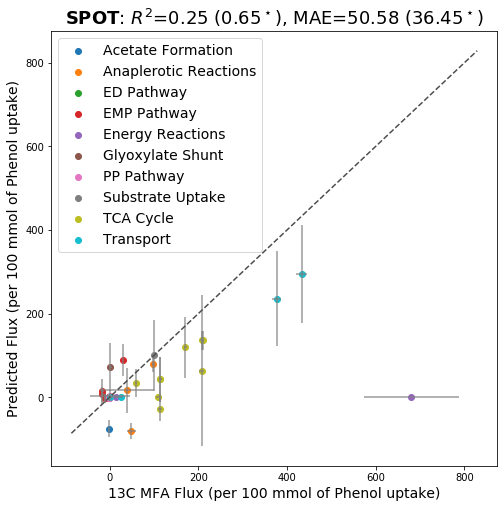

In [14]:
obs_vs_pred_scatter_plot_with_std(phenol_fluxes, substrate='phenol', method='SPOT', strain='WT', output_dir=output_dir)

#### **Plot PVHG Phenol SPOT Fluxes vs 13C MFA Fluxes**

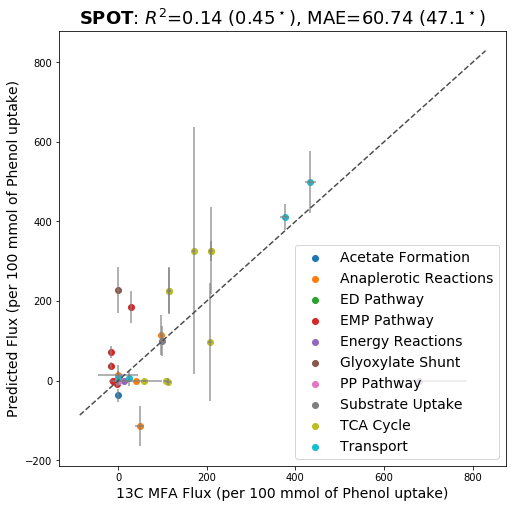

In [15]:
obs_vs_pred_scatter_plot_with_std(phenol_fluxes, substrate='phenol', method='SPOT', strain='PVHG', output_dir=output_dir)

#### **Display WT Phenol SPOT Flux Map**

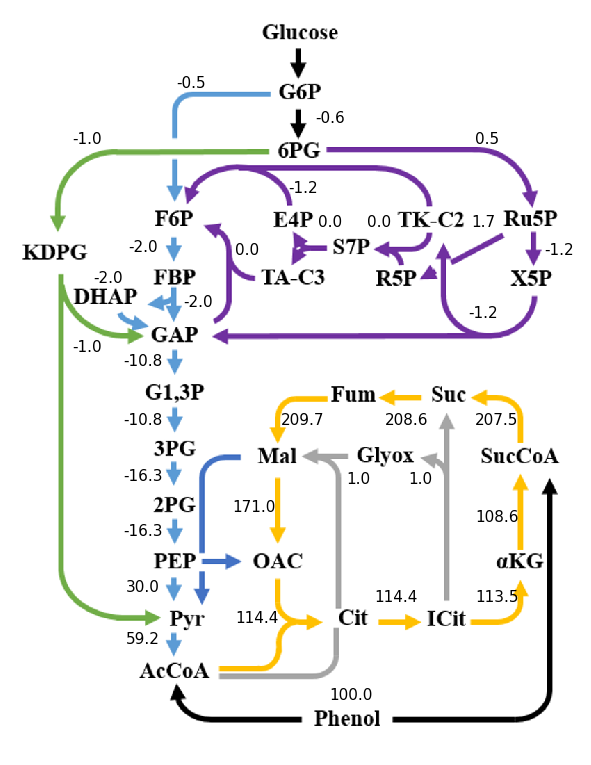

In [16]:
generate_flux_map(phenol_fluxes, 'Flux', substrate='phenol', method='SPOT', strain='WT', output_dir=output_dir)

#### **Display PVHG Phenol SPOT Flux Map**

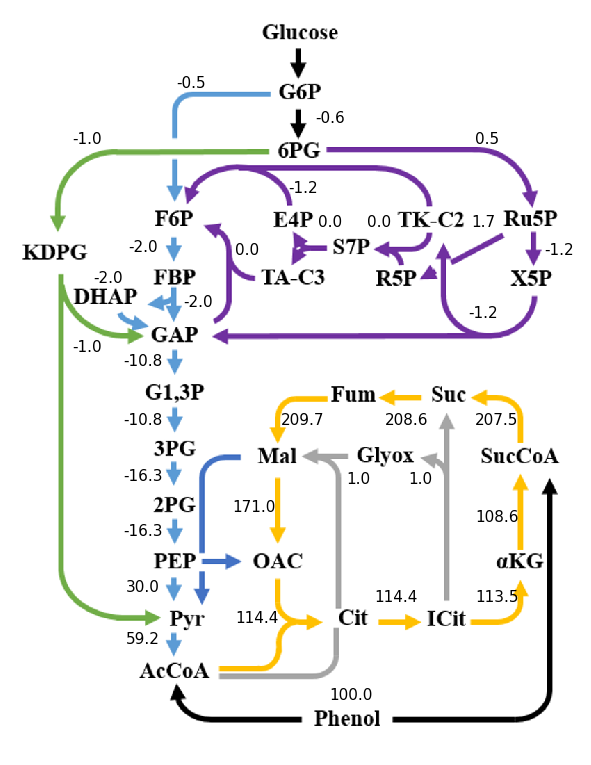

In [17]:
generate_flux_map(phenol_fluxes, 'Flux', substrate='phenol', method='SPOT', strain='PVHG', output_dir=output_dir)

#### **Load experimental growth parameters and SPOT Glucose Data**

In [18]:
consumption_and_growth_data = pd.read_csv('../data/growth_rates/spot_growth_rates.csv', index_col=0)
consumption_and_growth_data

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev,SPOT growth rate,SPOT growth std
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279,NaN,NaN
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785,NaN,NaN
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675,-2.417877e-10,1.385307e-10


#### **Calculate WT Phenol SPOT Growth Rate**

In [19]:
# get experimental uptake rate from table
exp_uptake_rate = consumption_and_growth_data.loc['WT-P', 'substrate consumption rate']

# get average and standard deviation of growth rate from dataframes
average_growth_rate = average_spot_solution_wt.loc['Growth_Phenol',:].values[0] 
std_growth_rate = std_spot_solution_wt.loc['Growth_Phenol',:].values[0] 

# get average and standard deviation of uptake rate from dataframes
average_uptake_rate = average_spot_solution_wt.loc['EX_phenol_e',:].values[0] 
std_uptake_rate = std_spot_solution_wt.loc['EX_phenol_e',:].values[0] 

# normalize growth rate to experimental uptake rate
spot_growth_rate_wt = -1 * exp_uptake_rate * (average_growth_rate / average_uptake_rate)
spot_growth_rate_std_wt = -1 * exp_uptake_rate * (std_growth_rate / average_uptake_rate)

# Delete later
print(exp_uptake_rate)
print(average_growth_rate)
print('average uptake rate', average_uptake_rate)

1.3520722607432194
-8.076026619939678e-12
average uptake rate -0.05310571472522532


#### **Calculate PVHG Phenol SPOT Growth Rate**

In [20]:
# get experimental uptake rate from table
exp_uptake_rate = consumption_and_growth_data.loc['PVHG-P', 'substrate consumption rate']

# get average and standard deviation of growth rate from dataframes
average_growth_rate = average_spot_solution_pvhg.loc['Growth_Phenol',:].values[0] 
std_growth_rate = std_spot_solution_pvhg.loc['Growth_Phenol',:].values[0] 

# get average and standard deviation of uptake rate from dataframes
average_uptake_rate = average_spot_solution_pvhg.loc['EX_phenol_e',:].values[0] 
std_uptake_rate = std_spot_solution_pvhg.loc['EX_phenol_e',:].values[0] 

# normalize growth rate to experimental uptake rate
spot_growth_rate_pvhg = -1 * exp_uptake_rate * (average_growth_rate / average_uptake_rate)
spot_growth_rate_std_pvhg = -1 * exp_uptake_rate * (std_growth_rate / average_uptake_rate)

# Delete later
print(exp_uptake_rate)
print(average_growth_rate)
print('average uptake rate', average_uptake_rate)

1.96748494522118
-4.369608463522513e-12
average uptake rate -0.018463065993164766


#### **Add Phenol SPOT Data to E-Flux Growth Rate Data**

In [21]:
# get values added in notebook G
spot_growth_rate_glucose = float(consumption_and_growth_data.loc['WT-G']['SPOT growth rate'])
spot_growth_rate_std_glucose = float(consumption_and_growth_data.loc['WT-G']['SPOT growth std'])


consumption_and_growth_data['SPOT growth rate'] = [
    spot_growth_rate_wt, spot_growth_rate_pvhg, spot_growth_rate_glucose
]
consumption_and_growth_data['SPOT growth std'] = [
    spot_growth_rate_std_wt, spot_growth_rate_std_pvhg, spot_growth_rate_std_glucose
]
consumption_and_growth_data

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev,SPOT growth rate,SPOT growth std
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279,-2.056158e-10,9.310437e-11
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785,-4.656398e-10,3.950104e-10
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675,-2.417877e-10,1.385307e-10


#### **Save SPOT Growth Rates**

In [22]:
consumption_and_growth_data.to_csv('../data/growth_rates/spot_growth_rates.csv', index=True, header= True)

#### **Plot SPOT Growth Rates**

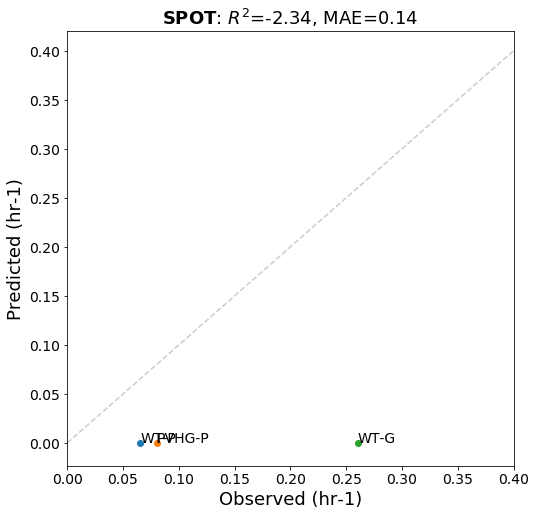

In [23]:
selectedlist = ['WT-P', 'PVHG-P', 'WT-G']
comparison_scatter_plot(
    consumption_and_growth_data.loc[selectedlist, 'growth rate'], 
    consumption_and_growth_data.loc[selectedlist, 'SPOT growth rate'], 
    selectedlist, 
    'SPOT',
    output_dir=output_dir
)